#### Performing Objective 3 -> To predict employees at the risk of under performance which leads to employee attrition
#### Use past and present employee information to predict which workers are likely to start underperforming soon. This lets managers take action early—such as offering training or support—before the person’s performance drops further or they decide to leave

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px


# Preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import train_test_split, cross_val_score

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilities
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ibm_dataset = pd.read_csv('./dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

hr_job_dataset = pd.read_csv('./dataset/HR_comma_sep.csv')

In [3]:
## loading the ibm_dataset

ibm_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
## loading the hr_job_dataset

hr_job_dataset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
## dropping the cols from the dataset which is irrelevant for the current use case

hr_job_dataset = hr_job_dataset.drop(['number_project', 'Work_accident'], axis=1)

In [6]:
hr_job_dataset.head(10)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,sales,low
1,0.80,0.86,262,6,1,0,sales,medium
2,0.11,0.88,272,4,1,0,sales,medium
3,0.72,0.87,223,5,1,0,sales,low
4,0.37,0.52,159,3,1,0,sales,low
5,0.41,0.50,153,3,1,0,sales,low
6,0.10,0.77,247,4,1,0,sales,low
7,0.92,0.85,259,5,1,0,sales,low
8,0.89,1.00,224,5,1,0,sales,low
9,0.42,0.53,142,3,1,0,sales,low


In [7]:
## filtering the dataset based on only 3 departments -> HR, Sales and R&D to keep the data uniform

selected_depts = ['sales', 'hr', 'RandD']
hr_job_filtered_df = hr_job_dataset[hr_job_dataset['Department'].isin(selected_depts)]

In [8]:
### printing the filtered df

hr_job_filtered_df.head(15)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,sales,low
1,0.80,0.86,262,6,1,0,sales,medium
2,0.11,0.88,272,4,1,0,sales,medium
3,0.72,0.87,223,5,1,0,sales,low
4,0.37,0.52,159,3,1,0,sales,low
5,0.41,0.50,153,3,1,0,sales,low
6,0.10,0.77,247,4,1,0,sales,low
7,0.92,0.85,259,5,1,0,sales,low
8,0.89,1.00,224,5,1,0,sales,low
9,0.42,0.53,142,3,1,0,sales,low


In [9]:
hr_job_filtered_df['Department'].value_counts()

Department
sales    4140
RandD     787
hr        739
Name: count, dtype: int64

In [10]:
hr_job_filtered_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,5666.0,0.613154,0.249288,0.09,0.44,0.64,0.82,1.0
last_evaluation,5666.0,0.709938,0.170975,0.36,0.55,0.71,0.86,1.0
average_montly_hours,5666.0,200.605542,49.620550,96.00,156.00,200.00,245.00,310.0
time_spend_company,5666.0,3.487646,1.435131,2.00,3.00,3.00,4.00,10.0
left,5666.0,0.238263,0.426059,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,5666.0,0.025062,0.156327,0.00,0.00,0.00,0.00,1.0


In [11]:
## Renaming the department values


hr_job_filtered_df['Department'] = hr_job_filtered_df['Department'].replace({
    'sales': 'Sales',
    'hr': 'Human Resources',
    'RandD': 'Research & Development'
})

hr_job_filtered_df['Department'].value_counts()

Department
Sales                     4140
Research & Development     787
Human Resources            739
Name: count, dtype: int64

In [12]:
## Renaming the satisfaction_level to JobSatisfactionLevel

hr_job_filtered_df = hr_job_filtered_df.rename(columns={'satisfaction_level': 'JobSatisfaction'})
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,0.53,157,3,1,0,Sales,low
1,0.80,0.86,262,6,1,0,Sales,medium
2,0.11,0.88,272,4,1,0,Sales,medium
3,0.72,0.87,223,5,1,0,Sales,low
4,0.37,0.52,159,3,1,0,Sales,low
5,0.41,0.50,153,3,1,0,Sales,low
6,0.10,0.77,247,4,1,0,Sales,low
7,0.92,0.85,259,5,1,0,Sales,low
8,0.89,1.00,224,5,1,0,Sales,low
9,0.42,0.53,142,3,1,0,Sales,low


In [13]:
### applying a logic of filtering condition for the job satisfaction level because it has to match the ibm dataset 

### To achieve -> 1 => "Low", 2 => "Medium", 3 => "High", 4 => "Very High"
### Criteria to apply -> <0.30 => Low, <0.50 => Medium , <0.80 => High, > 0.80 => Very High

def filtering_condition_job_satisfaction(val):
  if val < 0.35:
    return 1
  elif val >= 0.30 and val < 0.50:
    return 2
  elif val >= 0.50 and val < 0.80:
    return 3
  else:
    return 4

hr_job_filtered_df["JobSatisfaction"] = hr_job_filtered_df["JobSatisfaction"].apply(lambda x: filtering_condition_job_satisfaction(x))

In [14]:
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,2,0.53,157,3,1,0,Sales,low
1,4,0.86,262,6,1,0,Sales,medium
2,1,0.88,272,4,1,0,Sales,medium
3,3,0.87,223,5,1,0,Sales,low
4,2,0.52,159,3,1,0,Sales,low
5,2,0.50,153,3,1,0,Sales,low
6,1,0.77,247,4,1,0,Sales,low
7,4,0.85,259,5,1,0,Sales,low
8,4,1.00,224,5,1,0,Sales,low
9,2,0.53,142,3,1,0,Sales,low


In [15]:
## Renaming the coln name time_spend_company to YearsAtCompany
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'time_spend_company': 'YearsAtCompany'})


In [16]:
## changing the col name 'left' to Attrition name
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'left': 'Attrition'})

In [17]:
hr_job_filtered_df['Attrition'] = hr_job_filtered_df['Attrition'].replace({
    1: 'Yes',
    0: 'No'
})

In [18]:
hr_job_filtered_df.head(10)

,JobSatisfaction,last_evaluation,average_montly_hours,YearsAtCompany,Attrition,promotion_last_5years,Department,salary
0,2,0.53,157,3,Yes,0,Sales,low
1,4,0.86,262,6,Yes,0,Sales,medium
2,1,0.88,272,4,Yes,0,Sales,medium
3,3,0.87,223,5,Yes,0,Sales,low
4,2,0.52,159,3,Yes,0,Sales,low
5,2,0.50,153,3,Yes,0,Sales,low
6,1,0.77,247,4,Yes,0,Sales,low
7,4,0.85,259,5,Yes,0,Sales,low
8,4,1.00,224,5,Yes,0,Sales,low
9,2,0.53,142,3,Yes,0,Sales,low


In [19]:
## renaming the last_evaluation to PerformanceRating

hr_job_filtered_df = hr_job_filtered_df.rename(columns={'last_evaluation': 'PerformanceRating'})

### To achieve -> 1 => "Low", 2 => "Good", 3 => "Excellent", 4 => "Outstanding"
### Criteria to apply -> <0.30 => Low, <0.50 => Good , <0.80 => Excellent, > 0.80 => Outstanding

def filtering_condition_last_evaluation(val):
  if val < 0.35:
    return 1
  elif val >= 0.30 and val < 0.50:
    return 2
  elif val >= 0.50 and val < 0.80:
    return 3
  else:
    return 4

hr_job_filtered_df["PerformanceRating"] = hr_job_filtered_df["PerformanceRating"].apply(lambda x: filtering_condition_last_evaluation(x))
hr_job_filtered_df.head(10)

,JobSatisfaction,PerformanceRating,average_montly_hours,YearsAtCompany,Attrition,promotion_last_5years,Department,salary
0,2,3,157,3,Yes,0,Sales,low
1,4,4,262,6,Yes,0,Sales,medium
2,1,4,272,4,Yes,0,Sales,medium
3,3,4,223,5,Yes,0,Sales,low
4,2,3,159,3,Yes,0,Sales,low
5,2,3,153,3,Yes,0,Sales,low
6,1,3,247,4,Yes,0,Sales,low
7,4,4,259,5,Yes,0,Sales,low
8,4,4,224,5,Yes,0,Sales,low
9,2,3,142,3,Yes,0,Sales,low


In [20]:
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'promotion_last_5years': 'YearsSinceLastPromotion'})

def filtering_condition_for_promotion(val):
  if val == 0:
    return 0
  else: 
    return 5
  
hr_job_filtered_df["YearsSinceLastPromotion"] = hr_job_filtered_df["YearsSinceLastPromotion"].apply(lambda x: filtering_condition_for_promotion(x))

In [21]:
salary_stats = ibm_dataset['MonthlyIncome'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])
print(salary_stats)

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
95%      17821.350000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [22]:
hr_job_filtered_df = hr_job_filtered_df.rename(columns={'salary':'MonthlyIncome'})

def categorize_salary_based_on_categorical(val):
  if val == 'low':
    return salary_stats['50%']
  elif val == 'medium':
    return salary_stats['75%']
  else:
    return salary_stats['95%']
  
hr_job_filtered_df['MonthlyIncome'] = hr_job_filtered_df['MonthlyIncome'].apply(lambda x : categorize_salary_based_on_categorical(x))


In [23]:
hr_job_filtered_df.head(10)

,JobSatisfaction,PerformanceRating,average_montly_hours,YearsAtCompany,Attrition,YearsSinceLastPromotion,Department,MonthlyIncome
0,2,3,157,3,Yes,0,Sales,4919.0
1,4,4,262,6,Yes,0,Sales,8379.0
2,1,4,272,4,Yes,0,Sales,8379.0
3,3,4,223,5,Yes,0,Sales,4919.0
4,2,3,159,3,Yes,0,Sales,4919.0
5,2,3,153,3,Yes,0,Sales,4919.0
6,1,3,247,4,Yes,0,Sales,4919.0
7,4,4,259,5,Yes,0,Sales,4919.0
8,4,4,224,5,Yes,0,Sales,4919.0
9,2,3,142,3,Yes,0,Sales,4919.0


In [24]:
def calculate_rate(salary, monthly_hrs):
  no_of_working_days = 22
  working_hrs_per_day = 8
  hrs_per_month = monthly_hrs
  monthly_salary = salary
  
  hrly_rate = monthly_salary / hrs_per_month
  daily_rate = hrly_rate * working_hrs_per_day
  monthly_rate = int(daily_rate * no_of_working_days)
  hrly_rate = int(hrly_rate)
  daily_rate = int(daily_rate)
  
  return [hrly_rate, daily_rate, monthly_rate]

rates_df = pd.DataFrame(
  hr_job_filtered_df.apply(lambda x :  calculate_rate(x['MonthlyIncome'], x['average_montly_hours']), axis=1).tolist(),
  columns=['HourlyRate', 'DailyRate', 'MonthlyRate'],
  index=hr_job_filtered_df.index
)

hr_job_filtered_df = pd.concat([hr_job_filtered_df, rates_df], axis=1)

In [25]:
hr_job_filtered_df.drop(['average_montly_hours'], axis=1, inplace=True)

In [26]:
combined_dataset = pd.concat([ibm_dataset, hr_job_filtered_df], ignore_index=True)
combined_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6,4.0,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10,7.0,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0,0.0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8,7.0,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2,2.0,2,2.0
5,32.0,No,Travel_Frequently,1005,Research & Development,2.0,2.0,Life Sciences,1.0,8.0,...,3.0,80.0,0.0,8.0,2.0,2.0,7,7.0,3,6.0
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3.0,Medical,1.0,10.0,...,1.0,80.0,3.0,12.0,3.0,2.0,1,0.0,0,0.0
7,30.0,No,Travel_Rarely,1358,Research & Development,24.0,1.0,Life Sciences,1.0,11.0,...,2.0,80.0,1.0,1.0,2.0,3.0,1,0.0,0,0.0
8,38.0,No,Travel_Frequently,216,Research & Development,23.0,3.0,Life Sciences,1.0,12.0,...,2.0,80.0,0.0,10.0,2.0,3.0,9,7.0,1,8.0
9,36.0,No,Travel_Rarely,1299,Research & Development,27.0,3.0,Medical,1.0,13.0,...,2.0,80.0,2.0,17.0,3.0,2.0,7,7.0,7,7.0


In [27]:
combined_dataset.isnull().sum()

Age                         5666
Attrition                      0
BusinessTravel              5666
DailyRate                      0
Department                     0
DistanceFromHome            5666
Education                   5666
EducationField              5666
EmployeeCount               5666
EmployeeNumber              5666
EnvironmentSatisfaction     5666
Gender                      5666
HourlyRate                     0
JobInvolvement              5666
JobLevel                    5666
JobRole                     5666
JobSatisfaction                0
MaritalStatus               5666
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked          5666
Over18                      5666
OverTime                    5666
PercentSalaryHike           5666
PerformanceRating              0
RelationshipSatisfaction    5666
StandardHours               5666
StockOptionLevel            5666
TotalWorkingYears           5666
TrainingTimesLastYear       5666
WorkLifeBa

In [28]:
combined_dataset = combined_dataset.interpolate()

def over18_calculation(age):
  if combined_dataset[age] > 18.0:
    return 'Y'
  else: return 'N'
  
combined_dataset['Over18'] = combined_dataset.apply(lambda x: over18_calculation('Age') if math.isnan(x['Age']) else x['Age'], axis=1)




In [29]:
combined_dataset.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel              5666
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField              5666
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                      5666
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                     5666
JobSatisfaction                0
MaritalStatus               5666
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                    5666
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBa

In [30]:
## dropping the duplicates

combined_dataset = combined_dataset.drop_duplicates()
combined_dataset.duplicated().sum()

np.int64(0)

##### Filling the missing values using RandomCategoryImputer

In [31]:
from RandomCategoryImputer import RandomCategoryImputer

cat_cols = combined_dataset.select_dtypes(include=['object', 'category']).columns.tolist()
col_names_null = [col for col in cat_cols if combined_dataset[col].isna().sum() > 0]
print(col_names_null)

for col in col_names_null:
  compute_imputer = RandomCategoryImputer(random_state=42, alpha=0.5)
  imputed_df = compute_imputer.fit_transform(combined_dataset[[col]])
  combined_dataset[col] = imputed_df.squeeze()

['BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [32]:
combined_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [33]:
## Handling of missing value 

combined_dataset['EducationField'].value_counts()

EducationField
Life Sciences       2201
Medical             1675
Marketing            580
Technical Degree     463
Other                309
Human Resources       93
Name: count, dtype: int64

##### EDA Exploration

#### Checking what is the attrition rate for this dataset??

In [34]:
## printing the attrition rate %

attrition_rate = ((combined_dataset['Attrition'] == 'Yes').sum() / len(combined_dataset)) * 100
print(attrition_rate, "%")

### It is evident that the attrition rate for this dataset comes out to be 36.6% out of the total emp in the organisation

14.8468333020109 %


##### How is Attrition dependent on age? 

In [35]:
age_att=combined_dataset.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

###### Observation As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time.

##### How income factor affect attrition rate?

In [36]:
rate_att=combined_dataset.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(
  rate_att,
  x='MonthlyIncome',
  y='Counts',
  color='Attrition',
  color_discrete_map={
        'Yes': "#E66A2C", 
        'No': "#0FD039" 
  },
  title='Monthly Income basis counts of People in an Organization')
fig.update_traces(textposition='top right')
fig.show()

###### Observation As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 6k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

##### Does the Department of work impact attrition?

In [37]:
dept_att=combined_dataset.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(
  dept_att,
  x='Department',
  y='Counts',
  color='Attrition',
  text='Counts',
  color_discrete_map={
        'Yes': "#E61448",  
        'No': "#0FD039" 
  }, 
  title='Department wise Counts of People in an Organization')
fig.update_traces(textposition='auto')
fig.show()

###### Observations This data comprises of only 3 major departments- among which Human Resource Department has the highest attrition rates (18.39%), followed by the  Sales department has the highest attrition rates (15.02%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.11%).

##### How does the environment satisfaction impact attrition?

In [38]:
sats_att=combined_dataset.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(
  sats_att,
  x='EnvironmentSatisfaction',
  y='Counts',
  color='Attrition',
  color_discrete_map={
        'Yes': "#E614D1",  
        'No': "#0FD039" 
  }, 
  title='Environment Satisfaction level Counts of People in an Organization')

###### Observation In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

##### How does self Job Satisfaction impact the Attrition?

In [39]:
jsats_att=combined_dataset.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

###### Observation With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

##### Does company stocks for employees impact attrition

In [40]:
stock_att=combined_dataset.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig = px.bar(
  stock_att,
  x='StockOptionLevel',
  y='Counts',
  color='Attrition',
  text='Counts',
  color_discrete_map={
        'Yes': "#E61448",  
        'No': "#D0BD0F" 
  },
  title='Stock facilities level wise People in an Organization')
fig.show()

###### Observation The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

###### How does Work Life Balance impact the overall attrition rates?

In [41]:
wlb_att=combined_dataset.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(
  wlb_att,
  x='WorkLifeBalance',
  y='Counts',
  color='Attrition',
  text='Counts',
  color_discrete_map={
        'Yes': "#E61448",  
        'No': "#0FD039" 
  }, 
  title='Work Life Balance level Counts of People in an Organization')

###### Observation People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

##### How does work experience affect attrition?

In [42]:
ncwrd_att=combined_dataset.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

###### Observations As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

##### How does Work duration in current role impact Attrition?

In [43]:
yrscr_att=combined_dataset.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

###### Observation We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

##### Does Hike percentage impact Attrition?

In [44]:
hike_att=combined_dataset.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

###### Observation Higher hikes motivate people to work better, and stay in the organization. Henc we can see as the hike % increases, the chances of leaving the organization is reduced which is affected when the hike is lower

##### Are managers a reason of people resigning??

In [45]:
man_att=combined_dataset.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

###### Observation We notice 2 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

##### No of employees and attrition based on job role

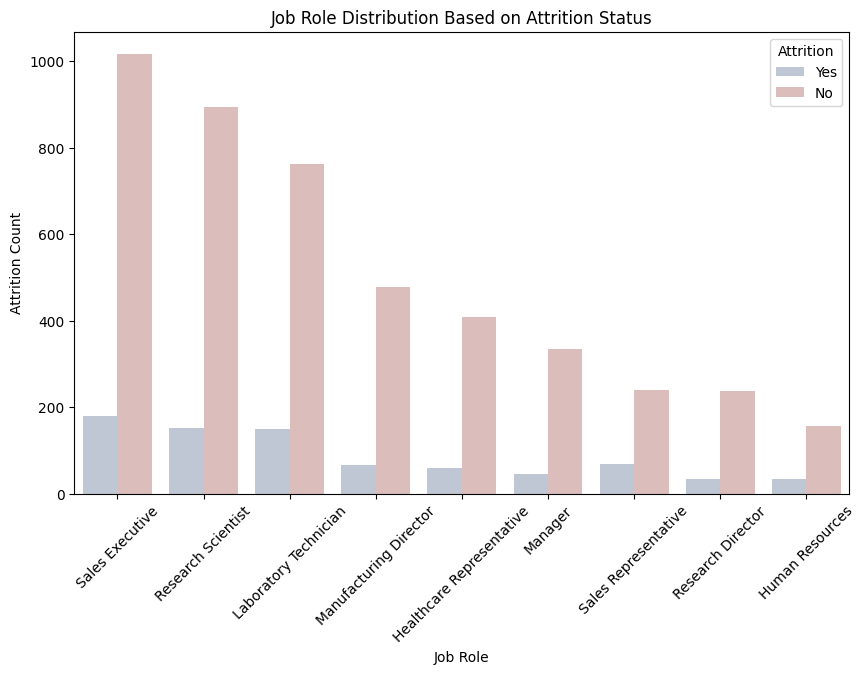

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=combined_dataset, x="JobRole", hue="Attrition", palette="vlag")
plt.xticks(rotation=45)
plt.title("Job Role Distribution Based on Attrition Status")
plt.ylabel("Attrition Count")
plt.xlabel("Job Role")
plt.show()

###### Attrition by Job Role - Overall, the number of employees who left the company (Attrition = Yes) is much lower compared to those who stayed (Attrition = No) across all job roles. However, positions such as Sales Executive and Research Scientist show both the highest number of retained employees and the highest number of employees who left. This indicates that these roles have a larger workforce compared to other positions.

#### Relation of Attrition by the Overtime working of the employees

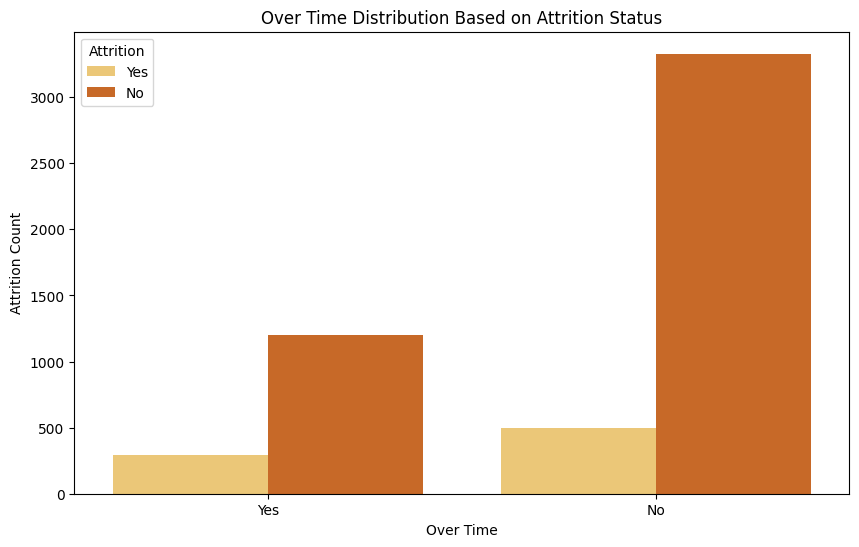

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=combined_dataset, x="OverTime", hue="Attrition", palette="YlOrBr")
plt.xlabel("Over Time")
plt.ylabel("Attrition Count")
plt.title("Over Time Distribution Based on Attrition Status")
plt.show()

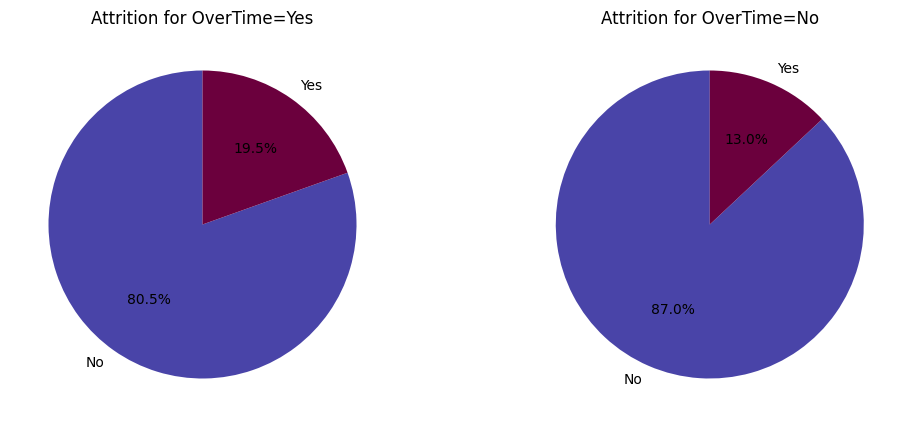

In [48]:
plt.figure(figsize=(12,5))
for i, status in enumerate(combined_dataset['OverTime'].unique()):
    plt.subplot(1,2,i+1)
    combined_dataset[combined_dataset['OverTime']==status]['Attrition'].value_counts().plot.pie(
        autopct='%1.1f%%',startangle=90, colors=["#4944a8", "#6b003d"])
    plt.title(f'Attrition for OverTime={status}')
    plt.ylabel('')
plt.show()

###### Overtime and Attrition -> This chart illustrates the relationship between overtime (OverTime) and attrition. The key finding is that employees who work overtime (OverTime = Yes) have a higher attrition rate compared to those who do not (OverTime = No).The majority of employees who do not work overtime remain with the company. This suggests that overtime may have a negative impact on employee retention and engagement.

##### Years since last promotion and its relation with the attrition rate

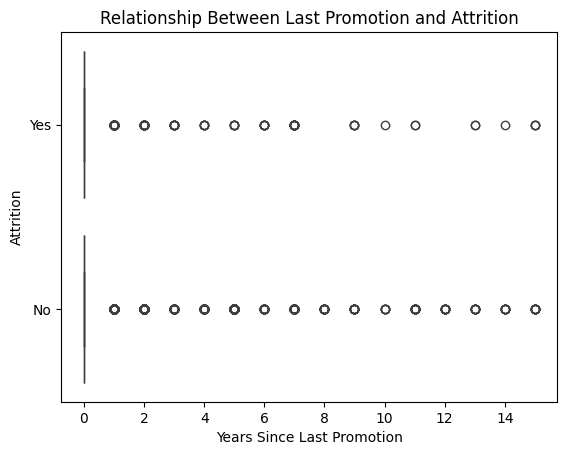

In [49]:
sns.boxplot(data=combined_dataset,x="YearsSinceLastPromotion",y="Attrition")
plt.title("Relationship Between Last Promotion and Attrition")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Attrition")
plt.show()

##### Relationship between education level and salary

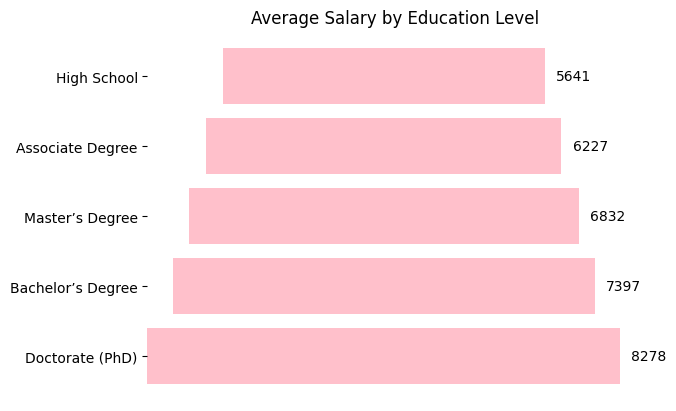

In [50]:
import matplotlib.pyplot as plt

# Education sayısal değerlerini etiketlere çevir
edu_map = {
    1: "High School",
    2: "Associate Degree",
    3: "Bachelor’s Degree",
    4: "Master’s Degree",
    5: "Doctorate (PhD)"
}

# Ortalama maaşları hesapla
summary = combined_dataset.groupby("Education")["MonthlyIncome"].mean()
summary.index = summary.index.map(edu_map)  # indexleri etiket yap
summary = summary.sort_values(ascending=False)

# Huni grafiği çiz
plt.barh(summary.index, summary.values, left=- summary.values/2, color="pink")
plt.title("Average Salary by Education Level")
plt.gca().xaxis.set_visible(False)
plt.box(False)

# Değer etiketleri ekle
for y, v in enumerate(summary.values):
    plt.text(v/2 + 200, y, f"{v:.0f}", va="center")
plt.show()

##### Relationship between promotion period and attrition

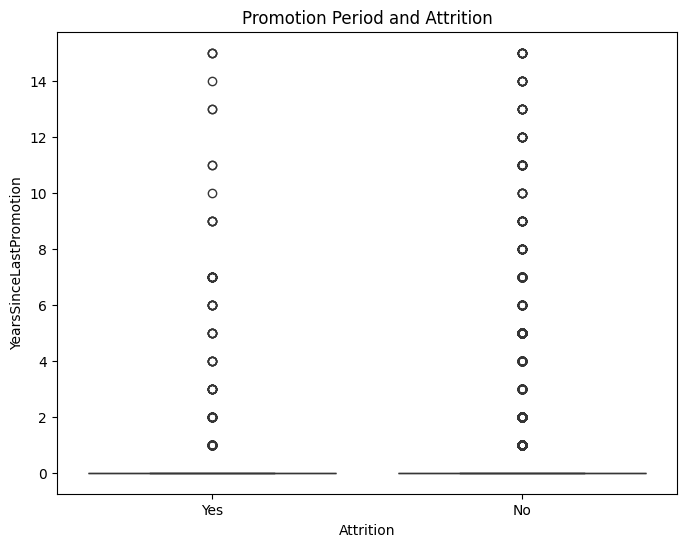

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=combined_dataset, palette='plasma')
plt.title('Promotion Period and Attrition')
plt.show()

###### As observed, the average salary increases with higher education levels. The highest average salary is seen at the PhD level, while the lowest is at the High School level. This clearly indicates a positive correlation between education level and earning potential.

#### Correlation Matrix

<Axes: >

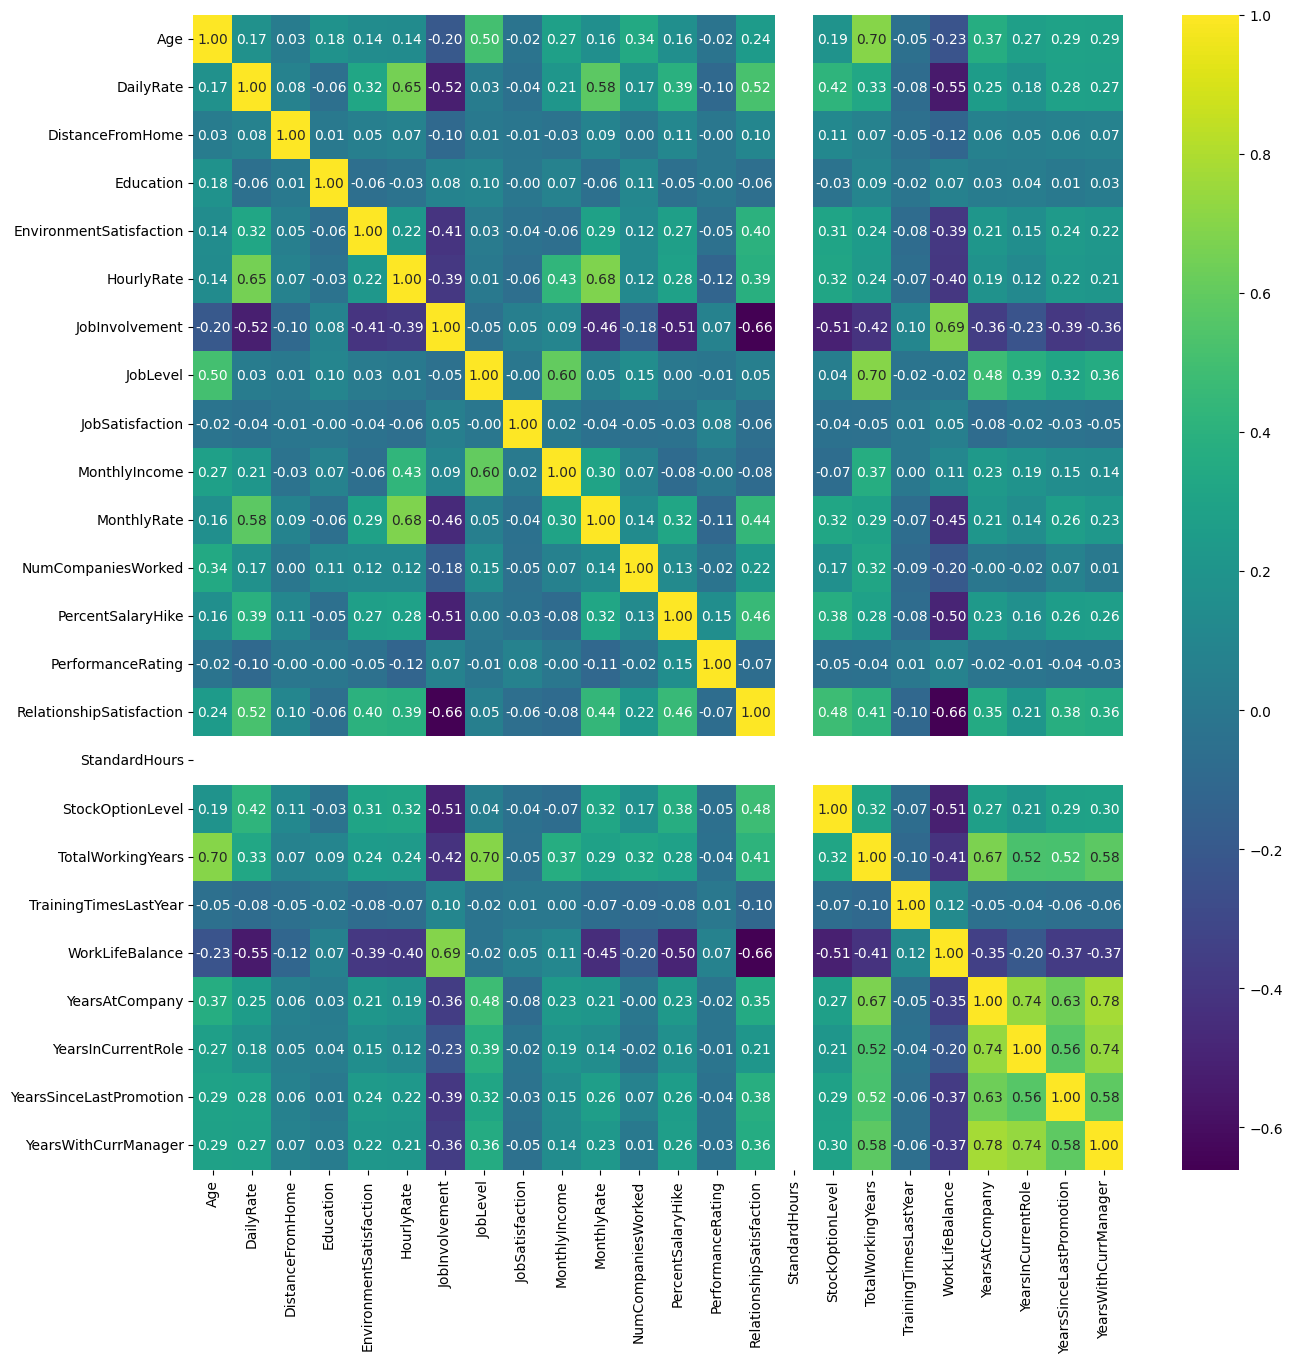

In [52]:
X=combined_dataset[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=combined_dataset[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

#### The correlation heatmap provides a comprehensive overview of the linear relationships between various numerical features in the dataset.

  1. Strong Positive Correlations:
  Age, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager: These variables show strong positive inter-correlations, forming a distinct darker blue block. This is intuitive, as older employees generally have more total working years, and often more years at the current company, leading to more promotions and longer tenure with their current manager.

  MonthlyIncome and JobLevel: There's a strong positive correlation between MonthlyIncome and JobLevel. This indicates that as an employee's job level increases, their monthly income tends to rise significantly.

  JobLevel, TotalWorkingYears, YearsAtCompany: JobLevel also shows strong positive correlations with TotalWorkingYears and YearsAtCompany, suggesting that higher job levels are typically achieved with more experience and tenure.

  2. Moderate Correlations:
  NumCompaniesWorked and TotalWorkingYears: A moderate negative correlation might be present (though not extremely dark), implying that employees with more total working years might have worked at fewer companies, or vice versa, depending on career trajectories.

  PerformanceRating and MonthlyIncome: While not extremely strong, there might be a slight positive correlation, indicating that higher performance could be associated with higher income.

  3. Weak or Negligible Correlations:
  DailyRate, HourlyRate, MonthlyRate: These rate-based variables show very weak correlations with most other variables, appearing as lighter squares. This suggests that the daily, hourly, or monthly payment rates themselves are largely independent of factors like age, total working years, or job level.

  DistanceFromHome: Generally, DistanceFromHome exhibits weak correlations with most other features, indicating that how far an employee lives from work does not strongly influence other factors like income, age, or job satisfaction.

  Gender, Education, EducationField: These categorical (or ordinal) variables, while present, often show weaker linear correlations with purely numerical continuous variables, as expected.

  Inference:

  The heatmap highlights critical interdependencies, particularly around age, experience, and career progression directly influencing income and job level. Features like daily/hourly rates and distance from home appear to be more independent. This analysis is valuable for understanding the underlying structure of the data and for guiding further modeling efforts, such as identifying potential multicollinearity or selecting relevant features for predicting outcomes like attrition.

#### Following observations from the dataset -

We have checked the data and came upon to infer the following observations :

- People are tending to switch to different jobs at the start of their career, or at the earlier parts of it. Once they have settled with a family or would have found stability in their jobs, they tend to stay long in the same organization, only going for vertical movements in the same organisation

- Salary and stock options have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees loyal to their company.

- Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.

- Departments where target meeting performance is very much crucial (eg Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (eg HR dept)

- People with good job satisfaction and environment satisfaction are loyal to the organization  and this speaks out loud for any org. However, people who are not much satisfied with their current project - tend to leave the organization far more.

#### 1. Environment Satisfaction vs. Attrition
This chart shows that as environment satisfaction increases, the attrition rate decreases. Employees with the lowest satisfaction level (1) have a higher likelihood of leaving, while higher satisfaction levels correspond to fewer departures. This highlights the importance of a positive work environment in retaining employees.

2. Job Satisfaction vs. Attrition
The chart indicates that as job satisfaction increases, the attrition rate declines. Employees with the highest satisfaction level (4) have a noticeably lower attrition rate compared to other levels. This demonstrates that job satisfaction is a critical factor for employee retention.

3. Work-Life Balance vs. Attrition
This chart illustrates that employees with the lowest work-life balance satisfaction (1) have a high attrition rate. Conversely, employees with the highest satisfaction levels (3 and 4) largely remain with the company. This underscores that a good work-life balance strongly influences employees’ decision to stay.

#### Machine Learning algorithms applied
 - Logistics Regression
 - Decision Trees Classifier
 - Random Forest Classifier
 - Gaussian Naive Bayes
 - XGBoost Classifier
 - Gradient Boosting Classifier
 - KNN Algo

In [53]:
num_cols=['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear']

In [54]:
cat_cols = ['Attrition','BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18','OverTime']

cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [55]:
combined_dataset['Attrition_ind'] = 0 
combined_dataset.loc[combined_dataset['Attrition'] =='Yes', 'Attrition_ind'] = 1


## dropping the employee number
combined_dataset.drop(["EmployeeNumber"], axis = 1, inplace=True)

In [56]:
combined_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41.0,Yes,Travel_Rarely,1102,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6,4.0,0,5.0,1
1,49.0,No,Travel_Frequently,279,Research & Development,8.0,1.0,Life Sciences,1.0,3.0,...,80.0,1.0,10.0,3.0,3.0,10,7.0,1,7.0,0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2.0,2.0,Other,1.0,4.0,...,80.0,0.0,7.0,3.0,3.0,0,0.0,0,0.0,1
3,33.0,No,Travel_Frequently,1392,Research & Development,3.0,4.0,Life Sciences,1.0,4.0,...,80.0,0.0,8.0,3.0,3.0,8,7.0,3,0.0,0
4,27.0,No,Travel_Rarely,591,Research & Development,2.0,1.0,Medical,1.0,1.0,...,80.0,1.0,6.0,3.0,3.0,2,2.0,2,2.0,0
5,32.0,No,Travel_Frequently,1005,Research & Development,2.0,2.0,Life Sciences,1.0,4.0,...,80.0,0.0,8.0,2.0,2.0,7,7.0,3,6.0,0
6,59.0,No,Travel_Rarely,1324,Research & Development,3.0,3.0,Medical,1.0,3.0,...,80.0,3.0,12.0,3.0,2.0,1,0.0,0,0.0,0
7,30.0,No,Travel_Rarely,1358,Research & Development,24.0,1.0,Life Sciences,1.0,4.0,...,80.0,1.0,1.0,2.0,3.0,1,0.0,0,0.0,0
8,38.0,No,Travel_Frequently,216,Research & Development,23.0,3.0,Life Sciences,1.0,4.0,...,80.0,0.0,10.0,2.0,3.0,9,7.0,1,8.0,0
9,36.0,No,Travel_Rarely,1299,Research & Development,27.0,3.0,Medical,1.0,3.0,...,80.0,2.0,17.0,3.0,2.0,7,7.0,7,7.0,0


In [57]:
combined_dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                   1039
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                   133
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1352
MonthlyRate                 1951
NumCompaniesWorked            10
Over18                        43
OverTime                       2
PercentSalaryHike             15
PerformanceRating              3
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [58]:
ibm = pd.get_dummies(combined_dataset)
ibm.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_ind', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degr

In [59]:
data_main=ibm.drop(['EmployeeCount','Over18','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41.0,1102,1.0,2.0,2.0,94,3.0,2.0,4,5993.0,...,False,False,False,True,False,False,False,True,False,True
1,49.0,279,8.0,1.0,3.0,61,2.0,2.0,2,5130.0,...,False,False,True,False,False,False,True,False,True,False
2,37.0,1373,2.0,2.0,4.0,92,2.0,1.0,3,2090.0,...,False,False,False,False,False,False,False,True,False,True
3,33.0,1392,3.0,4.0,4.0,56,3.0,1.0,3,2909.0,...,False,False,True,False,False,False,True,False,False,True
4,27.0,591,2.0,1.0,1.0,40,3.0,1.0,2,3468.0,...,False,False,False,False,False,False,True,False,True,False


In [60]:
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'Jo

In [61]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41.0,1102,1.0,2.0,2.0,94,3.0,2.0,4,5993.0,...,False,False,True,False,False,False,True,False,True,1
1,49.0,279,8.0,1.0,3.0,61,2.0,2.0,2,5130.0,...,False,True,False,False,False,True,False,True,False,0
2,37.0,1373,2.0,2.0,4.0,92,2.0,1.0,3,2090.0,...,False,False,False,False,False,False,True,False,True,1
3,33.0,1392,3.0,4.0,4.0,56,3.0,1.0,3,2909.0,...,False,True,False,False,False,True,False,False,True,0
4,27.0,591,2.0,1.0,1.0,40,3.0,1.0,2,3468.0,...,False,False,False,False,False,True,False,True,False,0


In [62]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [63]:
X=data_main.drop('Attrition',axis=1)
y=data_main.Attrition

In [64]:
features_label = data_main.columns[:-1]
features_label

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

##### Using RandomForestClassifier in the dataset

In [65]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rfc.fit(X, y)
importances = rfc.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.140642
 2) DailyRate                      0.117497
 3) DistanceFromHome               0.109567
 4) Education                      0.104222
 5) EnvironmentSatisfaction        0.086675
 6) HourlyRate                     0.051654
 7) JobInvolvement                 0.047754
 8) JobLevel                       0.021168
 9) JobSatisfaction                0.016925
10) MonthlyIncome                  0.015409
11) MonthlyRate                    0.012958
12) NumCompaniesWorked             0.011813
13) PercentSalaryHike              0.011808
14) PerformanceRating              0.011802
15) RelationshipSatisfaction       0.011451
16) StockOptionLevel               0.011234
17) TotalWorkingYears              0.010684
18) TrainingTimesLastYear          0.010104
19) WorkLifeBalance                0.010074
20) YearsAtCompany                 0.009813
21) YearsInCurrentRole             0.009587
22) YearsSinceLastPromotion        0.009310
23) YearsWithCurrManager        

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [67]:
### Performing feature scaling

sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

#### Applying ML Algorithms

In [68]:
### Performing Logistics Regression , Decision Trees and Random Forest Classifier

lr=LogisticRegression()
dc=DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2,  min_samples_leaf=1,random_state=42)
rf=RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()
gb = GradientBoostingClassifier()


model_list = [lr, dc, rf, knn, xgb, gnb, gb]

## storing the results in the dataframe

Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1'])

for model in model_list:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print('Model:', model.__class__.__name__)
    print('-----------------------------------------------------------------------------------------------------------------------')
    print('Confusion Matrix:\n', confusion_matrix(y_test, ypred))
    print('Classification Report:\n', classification_report(y_test, ypred))
    print('Accuracy:', round(accuracy_score(y_test, ypred), 2))
    print('Precision:', round(precision_score(y_test, ypred), 2))
    print('Recall:', round(recall_score(y_test, ypred), 2))
    print('F1 Score:', round(f1_score(y_test, ypred), 2))
    print()

    # Append results
    R={'Model':model,
             'Accuracy':round(accuracy_score(y_test,ypred),2),
             'Recall':round(recall_score(y_test,ypred),2),
             'Precision':round(precision_score(y_test,ypred),2),
             'F1':round(f1_score(y_test,ypred),2)
            }
    Results=pd.concat([Results, pd.DataFrame([R])], ignore_index=True)

    
## displaying the summary 

print("Summary of Model Performance:")
print(Results.sort_values(by='F1', ascending=False))


Model: LogisticRegression
-----------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[890  16]
 [138  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       906
           1       0.57      0.13      0.21       159

    accuracy                           0.86      1065
   macro avg       0.72      0.56      0.57      1065
weighted avg       0.82      0.86      0.81      1065

Accuracy: 0.86
Precision: 0.57
Recall: 0.13
F1 Score: 0.21

Model: DecisionTreeClassifier
-----------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[817  89]
 [ 61  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       906
           1       0.52      0.62      0.57       159

    accuracy         